

# Project: No-show appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> Missed medical appointments are common across the world. Many people miss their appointments for different reasons, some forget their appointments, some fear the result of the examination, and others do not show up because they are careless.
In this project, we are going to analyze a dataset from 100K medical appointments in Brazil and find associations between people who show up or not and other parameters like age, gender, diabetes and others.


### Data Dictionary:

- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- ScheduledDay: Which day the patient set up their appointment
- AppointmentDay: The day when the patient have to visit the doctor.
- Age: How old is the patient.
- Neighbourhood: indicates the location of the hospital.
- Scholarship = indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap = True or False
- SMS_received: 1 or more messages sent to the patient. 
- No-show: True or False.
- No-show: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [2]:
# Import statements for all of the packages I
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# matplot magic line
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load the data and print out a few lines. 
df = pd.read_csv('noshow.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Shape of the data
print ("Number of rows:" ,df.shape[0])
print ("Number of columns:",df.shape[1] )

Number of rows: 110527
Number of columns: 14


In [5]:
# Check the fields and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check if there is any null data in this dataset
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
# Check for duplicate rows
sum(df.duplicated())

0

There are no null values in this dataset.

## Data Cleaning 
In this section I am going to rename columns names, drop unwanted data and prepare if for analysis.

In [8]:
# Rename columns to fix typos and spelling mistakes
df.rename(columns={'PatientId':'PatientID',
                   'Handcap':'Handicap', 
                   'Hipertension':'Hypertension',
                  'No-show': 'No_show'}, 
          inplace=True
         )
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Columns: PatientID and AppointmentID are of no use in my analysis, so I am going to drop them.

In [9]:
# Drop PatientID and AppointmentID
df.drop(['PatientID', 'AppointmentID'], axis=1, inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As we can notice from the above descriptive statistics the min age is less than zero, so I am going to drop this row.

In [11]:
df_age_negative = df[df['Age'] < 0]
#df_age_negative.index
df =df.drop(df_age_negative.index, axis = 0)
df.describe() 

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Exploratory Data Analysis
Create masks to for patients who show up on their appointments and for those who didn't.

In [14]:
show = df['No_show'] == "No"
no_show = df['No_show'] == "Yes"

### Research Question 1 (Who visits the doctor more often?)

From the below graph we can conclude that women are more likely to visit the doctor. Women visit doctors during their reproductive period for preganancy check_ups, for menstrual cycle problems due to hormone fluctuation. Women in general take care of their health more than men.
Out of the 88,000 patients that have turned up, around 57,000 of them are Females and 31,000 are Males.



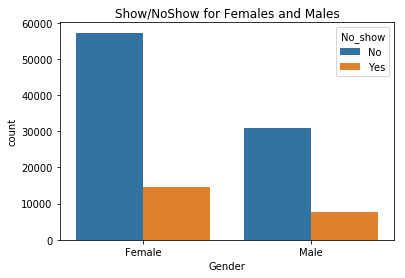

In [15]:
ax = sns.countplot(x=df['Gender'], hue=df['No_show'], data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The above barplot shows the number of females and males who showed up compared to those who didn't. The blue bar shows those who did and the orange one is for the ones who didn't.

In [17]:
# Ratio of not showing up among men and women
noshow_f_proportion = df[no_show]['Gender'].value_counts() / df['Gender'].value_counts()
noshow_f_proportion




F    0.203149
M    0.199679
Name: Gender, dtype: float64

Although females visit the doctor more often, however the ratio of not showing up for both genders is the same.

### Research Question 2  (Relation between age and not showing up on medical appointment)

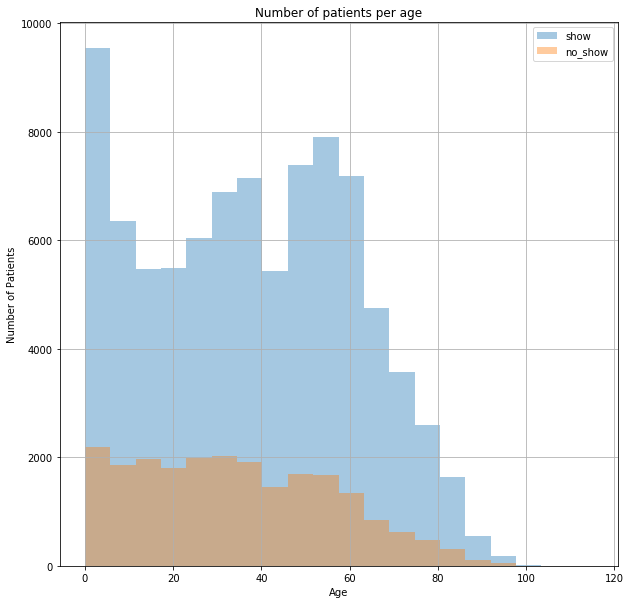

In [18]:
df[show]['Age'].hist(figsize = [10, 10], alpha = 0.4, bins = 20, label = "show");
df[no_show]['Age'].hist(figsize = [10, 10], alpha = 0.4, bins = 20, label = "no_show");
plt.legend();
plt.title("Number of patients per age");
plt.xlabel("Age");
plt.ylabel("Number of Patients");

The above histogram shows the number of patients who showed up( the blue area) versus the number of patients who didn't(the brown area) at each age.

In [19]:
no_show_patients = df[no_show]['Age'].value_counts()
no_show_patients
total = df['Age'].value_counts()
total
no_show_proportion = no_show_patients / total

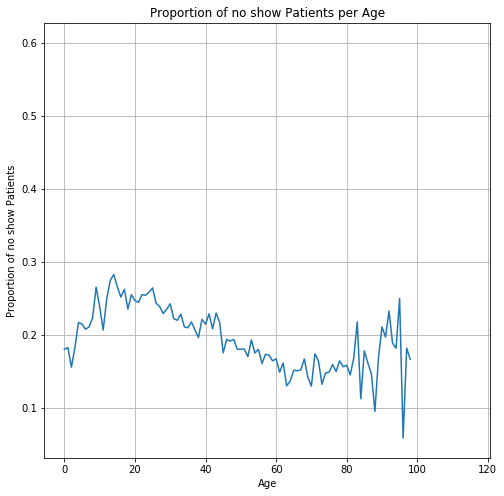

In [20]:
no_show_proportion = (no_show_patients/total)
no_show_proportion.plot(figsize = [8, 8], grid = True);
plt.title("Proportion of no show Patients per Age");
plt.xlabel("Age");
plt.ylabel("Proportion of no show Patients");

This graph illustrates the proportion of no-show patients at each age.

From the above figures, we can notice that patients older than 60 are less likely to miss their medical appointments. In addition, patients older than 45 are very likely to show up on their medical appointments.

### Research Question 3  (Will sending SMS notifications to patients will help patients show up on their medical appointments?)

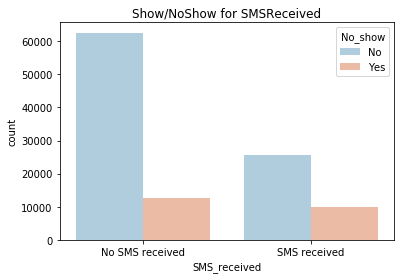

In [25]:
ax = sns.countplot(x=df.SMS_received, hue=df.No_show, data=df, palette="RdBu_r")
ax.set_title("Show/NoShow for SMSReceived")
x_ticks_labels=['No SMS received', 'SMS received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The above figure depicts the relation between the number of patients who received or not SMS notifications and if they turn up or not on their appointments.

### Percentage of patients who receive SMS

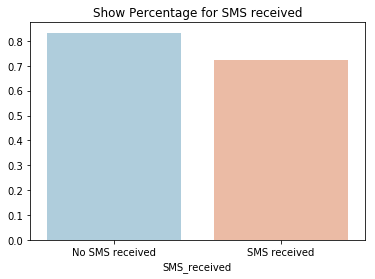

In [23]:
df_s_ratio = df[show].groupby(['SMS_received']).size()/df.groupby(['SMS_received']).size()
ax = sns.barplot(x=df_s_ratio.index, y=df_s_ratio, palette="RdBu_r")
ax.set_title("Show Percentage for SMS received")
x_ticks_labels=['No SMS received', 'SMS received']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The above plot illustrates the percentage of patients who received SMS and showed up versus those who didn't receive SMS and showed up.

In [27]:
# Ratio of patients who receive SMS and show up
df_s_ratio

SMS_received
0    0.832965
1    0.724255
dtype: float64

Contrary to the belief that when clinics and hospitals send SMS notifications to patients will remind them of their medical appointments and the rate of not showing up will go down. However our data set shows the opposite patients who receive SMS are less inclined to show up on their appointments. 

### Research Question 4 (Association between scholarship and no show?)

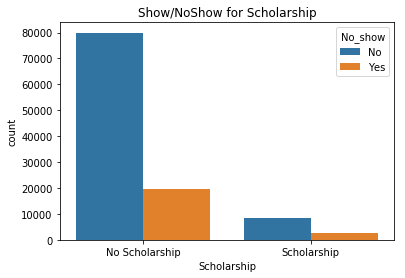

In [15]:
ax = sns.countplot(x=df['Scholarship'], hue=df['No_show'], data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

The above figure demonstrates the relationship between no-show variable with the scholarship variable.

From the above visualization we can see that there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit. Out of the 10,500 patients with Scholarship around 75% of them have come for the visit. So, Scholarship program did not help people to show up on their medical appointments.

<a id='conclusions'></a>
## Conclusions

> Age appears to be a good predictor if the patient will turn up on the medical appointment.However, SMS reminder contrary to the belief did not increase show ups. Also, patients with scholarships program are less inclined to attend the appointments.


### Limitations of the dataset

> * Errorneous values like those negative values of age.
* Missing features which may be helpful in predicting whether the patient will show up or not like income, education level and the pain level of the patient. In addition, past behaviour of the patient if she used to miss her  medical appointments or not.
* This dataset is not an accurate representation of the population since it only has data of specific regions in Brazil.

